In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mypipes import *
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt 

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

from ModelClassification import *

In [4]:
Medicine_train=pd.read_csv(r"G:\Python_new\Project6\train.csv")
Medicine_test=pd.read_csv(r"G:\Python_new\Project6\test_share.csv")

In [52]:
Medicine_test.shape

(10854, 5)

In [77]:
Medicine_train.info

<bound method DataFrame.info of           PatientId  AppointmentID          ScheduledDay  \
0      2.987250e+13        5642903  2016-04-29T18:38:08Z   
1      5.589978e+14        5642503  2016-04-29T16:08:27Z   
2      8.679512e+11        5642828  2016-04-29T17:29:31Z   
3      8.841186e+12        5642494  2016-04-29T16:07:23Z   
4      9.598513e+13        5626772  2016-04-27T08:36:51Z   
...             ...            ...                   ...   
99485  9.969977e+14        5650534  2016-05-03T07:51:47Z   
99486  3.635534e+13        5651072  2016-05-03T08:23:40Z   
99487  3.596266e+12        5650093  2016-05-03T07:27:33Z   
99488  1.557663e+13        5630692  2016-04-27T16:03:52Z   
99489  3.775115e+14        5629448  2016-04-27T13:30:56Z   

             AppointmentDay  SMS_received No-show  
0      2016-04-29T00:00:00Z             0      No  
1      2016-04-29T00:00:00Z             0      No  
2      2016-04-29T00:00:00Z             0      No  
3      2016-04-29T00:00:00Z            

In [5]:
med=pd.read_csv(r"G:\Python_new\Project6\medical_history.csv")

In [61]:
med.shape

(62299, 5)

In [60]:
med.loc[(med["Hipertension"]==1) & (med["Diabetes"]==1) , :]

,PatientId,Hipertension,Diabetes,Alcoholism,Handcap
4,8.841186e+12,1,1,0,0
35,7.298459e+13,1,1,0,0
36,1.578132e+12,1,1,0,0
43,2.741649e+11,1,1,0,0
46,5.894585e+11,1,1,0,0
...,...,...,...,...,...
62173,6.937144e+13,1,1,0,0
62179,2.998129e+12,1,1,0,0
62183,3.327696e+09,1,1,0,0
62276,4.994742e+12,1,1,0,0


In [62]:
3583/62299

0.05751296168477825

In [6]:
dem=pd.read_csv(r"G:\Python_new\Project6\demographic_details.csv")

In [7]:
comb=pd.merge(med,dem,how='outer',on='PatientId')

In [8]:
train=pd.merge(Medicine_train,comb,how='left',on='PatientId')
test1=pd.merge(Medicine_test,comb,how='left',on='PatientId')

In [88]:
train.to_csv(r"G:\Python_new\Project6\train_complete.csv",index=False)

In [9]:
train_data,test_data=train_test_split(train,test_size=0.2,random_state=42)

In [10]:
train_data.to_csv(r"G:\Python_new\Project6\bd_train.csv",index=False)
test_data.to_csv(r"G:\Python_new\Project6\bd_test.csv",index=False)
test1.to_csv(r"G:\Python_new\Project6\test.csv",index=False)

In [11]:
bd_train=pd.read_csv(r"G:\Python_new\Project6\bd_train.csv")
bd_test=pd.read_csv(r"G:\Python_new\Project6\bd_test.csv")
test=pd.read_csv(r"G:\Python_new\Project6\test.csv")

In [12]:
bd_train

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,3.334786e+11,5577062,2016-04-13T09:25:26Z,2016-05-11T00:00:00Z,1,Yes,0,0,0,0,M,8,RESISTÊNCIA,0
1,1.198157e+12,5683827,2016-05-11T07:55:08Z,2016-05-11T00:00:00Z,0,Yes,0,0,0,0,M,10,NOVA PALESTINA,1
2,9.587963e+14,5698577,2016-05-16T07:41:12Z,2016-05-16T00:00:00Z,0,No,0,0,0,0,F,33,PRAIA DO CANTO,0
3,3.219194e+12,5638632,2016-04-29T08:14:31Z,2016-05-30T00:00:00Z,1,No,0,0,0,0,M,22,INHANGUETÁ,0
4,9.975853e+14,5732389,2016-05-24T11:25:22Z,2016-06-03T00:00:00Z,0,No,0,0,0,0,F,79,REPÚBLICA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79587,6.919555e+13,5705134,2016-05-16T18:37:44Z,2016-05-19T00:00:00Z,0,No,1,0,1,0,M,53,SANTO ANDRÉ,0
79588,4.486625e+14,5679560,2016-05-10T10:06:43Z,2016-05-12T00:00:00Z,0,No,0,0,0,0,M,19,GURIGICA,0
79589,2.135451e+13,5763038,2016-06-02T08:29:06Z,2016-06-03T00:00:00Z,0,No,0,0,0,0,M,43,TABUAZEIRO,0
79590,5.995927e+12,5536318,2016-04-01T08:29:54Z,2016-04-29T00:00:00Z,1,No,0,0,0,0,F,75,JARDIM CAMBURI,0


In [13]:
bd_test

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,5.351772e+13,5662410,2016-05-05T08:30:34Z,2016-05-25T00:00:00Z,1,No,0,0,0,0,F,34,SANTA MARTHA,1
1,5.335172e+13,5665253,2016-05-05T14:09:17Z,2016-05-06T00:00:00Z,0,Yes,0,0,0,0,F,17,VILA RUBIM,0
2,1.937423e+13,5765491,2016-06-02T13:07:05Z,2016-06-02T00:00:00Z,0,No,0,0,0,0,F,59,ILHA DE SANTA MARIA,0
3,1.527514e+13,5639323,2016-04-29T08:57:23Z,2016-05-05T00:00:00Z,1,No,0,0,0,0,F,51,DA PENHA,0
4,4.113917e+12,5655158,2016-05-03T16:08:25Z,2016-05-04T00:00:00Z,0,No,1,0,0,0,F,51,ITARARÉ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19893,5.865239e+13,5675121,2016-05-09T13:06:45Z,2016-05-09T00:00:00Z,0,No,0,0,0,0,F,15,GURIGICA,0
19894,5.354813e+14,5741815,2016-05-30T07:27:10Z,2016-06-03T00:00:00Z,1,No,0,0,0,0,F,3,CRUZAMENTO,0
19895,8.634164e+12,5677174,2016-05-09T18:23:05Z,2016-05-09T00:00:00Z,0,No,0,0,0,0,M,40,JUCUTUQUARA,0
19896,5.632912e+13,5705340,2016-05-17T07:06:40Z,2016-05-17T00:00:00Z,0,No,0,0,0,0,F,23,ILHA DAS CAIEIRAS,0


In [14]:
bd_train.isnull().sum()

PatientId         0
AppointmentID     0
ScheduledDay      0
AppointmentDay    0
SMS_received      0
No-show           0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
Gender            0
Age               0
Neighbourhood     0
Scholarship       0
dtype: int64

In [15]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79592 entries, 0 to 79591
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       79592 non-null  float64
 1   AppointmentID   79592 non-null  int64  
 2   ScheduledDay    79592 non-null  object 
 3   AppointmentDay  79592 non-null  object 
 4   SMS_received    79592 non-null  int64  
 5   No-show         79592 non-null  object 
 6   Hipertension    79592 non-null  int64  
 7   Diabetes        79592 non-null  int64  
 8   Alcoholism      79592 non-null  int64  
 9   Handcap         79592 non-null  int64  
 10  Gender          79592 non-null  object 
 11  Age             79592 non-null  int64  
 12  Neighbourhood   79592 non-null  object 
 13  Scholarship     79592 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 8.5+ MB


array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'SMS_received'}>],
       [<Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>],
       [<Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>]], dtype=object)

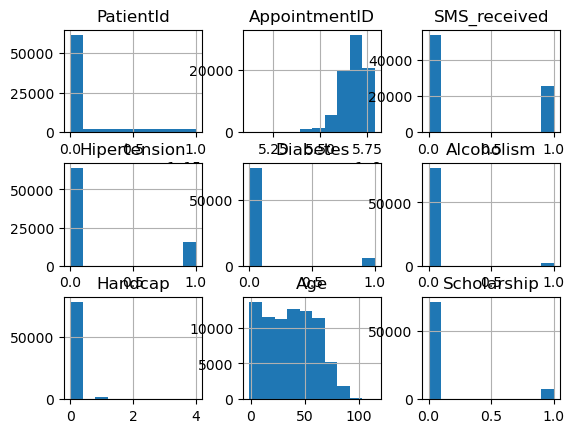

In [16]:
bd_train.hist()

In [17]:
bd_train

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,SMS_received,No-show,Hipertension,Diabetes,Alcoholism,Handcap,Gender,Age,Neighbourhood,Scholarship
0,3.334786e+11,5577062,2016-04-13T09:25:26Z,2016-05-11T00:00:00Z,1,Yes,0,0,0,0,M,8,RESISTÊNCIA,0
1,1.198157e+12,5683827,2016-05-11T07:55:08Z,2016-05-11T00:00:00Z,0,Yes,0,0,0,0,M,10,NOVA PALESTINA,1
2,9.587963e+14,5698577,2016-05-16T07:41:12Z,2016-05-16T00:00:00Z,0,No,0,0,0,0,F,33,PRAIA DO CANTO,0
3,3.219194e+12,5638632,2016-04-29T08:14:31Z,2016-05-30T00:00:00Z,1,No,0,0,0,0,M,22,INHANGUETÁ,0
4,9.975853e+14,5732389,2016-05-24T11:25:22Z,2016-06-03T00:00:00Z,0,No,0,0,0,0,F,79,REPÚBLICA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79587,6.919555e+13,5705134,2016-05-16T18:37:44Z,2016-05-19T00:00:00Z,0,No,1,0,1,0,M,53,SANTO ANDRÉ,0
79588,4.486625e+14,5679560,2016-05-10T10:06:43Z,2016-05-12T00:00:00Z,0,No,0,0,0,0,M,19,GURIGICA,0
79589,2.135451e+13,5763038,2016-06-02T08:29:06Z,2016-06-03T00:00:00Z,0,No,0,0,0,0,M,43,TABUAZEIRO,0
79590,5.995927e+12,5536318,2016-04-01T08:29:54Z,2016-04-29T00:00:00Z,1,No,0,0,0,0,F,75,JARDIM CAMBURI,0


In [18]:
cat_var=["SMS_received","Hipertension","Diabetes","Alcoholism","Handcap","Gender","Neighbourhood","Scholarship"]

In [19]:
bd_train[cat_var]=bd_train[cat_var].astype(object)
bd_test[cat_var]=bd_test[cat_var].astype(object)
test[cat_var]=test[cat_var].astype(object)

In [20]:
bd_train[cat_var].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79592 entries, 0 to 79591
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SMS_received   79592 non-null  object
 1   Hipertension   79592 non-null  object
 2   Diabetes       79592 non-null  object
 3   Alcoholism     79592 non-null  object
 4   Handcap        79592 non-null  object
 5   Gender         79592 non-null  object
 6   Neighbourhood  79592 non-null  object
 7   Scholarship    79592 non-null  object
dtypes: object(8)
memory usage: 4.9+ MB


In [21]:
bd_test[cat_var].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SMS_received   19898 non-null  object
 1   Hipertension   19898 non-null  object
 2   Diabetes       19898 non-null  object
 3   Alcoholism     19898 non-null  object
 4   Handcap        19898 non-null  object
 5   Gender         19898 non-null  object
 6   Neighbourhood  19898 non-null  object
 7   Scholarship    19898 non-null  object
dtypes: object(8)
memory usage: 1.2+ MB


In [22]:
79592+19898

99490

In [23]:
num_var=["Age"]

In [24]:
(bd_train["Age"]==0).sum()

2610

In [25]:
(bd_test["Age"]==0).sum()

641

In [26]:
date_var=["ScheduledDay","AppointmentDay"]

In [27]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [28]:
p1=pdPipeline([
    ('var_select',VarSelector(cat_var)), 
    ('data_frame_imputer',DataFrameImputer()),
    ('get_dummies_Pipe',get_dummies_Pipe(20))
])

p2=pdPipeline([
    ('var_select',VarSelector(num_var)),
    ('data_frame_imputer',DataFrameImputer())
])
p3=pdPipeline([
    ('var_select',VarSelector(date_var)),
    ('Date_data',DateDifferenceExtractor()),
])
    

In [29]:
data_pipe=FeatureUnion([
    ('p1',p1),
    ('p2',p2),
    ('p3',p3)
])

In [30]:
dp_fit=data_pipe.fit(bd_train)

In [31]:
dp_fit.get_feature_names_out()

array(['p1__SMS_received_0', 'p1__Hipertension_0', 'p1__Diabetes_0',
       'p1__Alcoholism_0', 'p1__Handcap_0', 'p1__Handcap_1',
       'p1__Handcap_2', 'p1__Gender_F',
       'p1__Neighbourhood_JARDIM CAMBURI',
       'p1__Neighbourhood_MARIA ORTIZ', 'p1__Neighbourhood_RESISTÊNCIA',
       'p1__Neighbourhood_JARDIM DA PENHA', 'p1__Neighbourhood_ITARARÉ',
       'p1__Neighbourhood_CENTRO', 'p1__Neighbourhood_SANTA MARTHA',
       'p1__Neighbourhood_TABUAZEIRO',
       'p1__Neighbourhood_JESUS DE NAZARETH',
       'p1__Neighbourhood_SANTO ANTÔNIO', 'p1__Neighbourhood_BONFIM',
       'p1__Neighbourhood_SANTO ANDRÉ', 'p1__Neighbourhood_JABOUR',
       'p1__Neighbourhood_CARATOÍRA', 'p1__Neighbourhood_SÃO PEDRO',
       'p1__Neighbourhood_NOVA PALESTINA',
       'p1__Neighbourhood_ILHA DO PRÍNCIPE', 'p1__Neighbourhood_DA PENHA',
       'p1__Neighbourhood_ANDORINHAS', 'p1__Neighbourhood_ROMÃO',
       'p1__Neighbourhood_GURIGICA', 'p1__Neighbourhood_BELA VISTA',
       'p1__Neighbourhood_M

In [32]:
columns=[re.sub('p\d__','',nm) for nm in dp_fit.get_feature_names_out()]
columns

['SMS_received_0',
 'Hipertension_0',
 'Diabetes_0',
 'Alcoholism_0',
 'Handcap_0',
 'Handcap_1',
 'Handcap_2',
 'Gender_F',
 'Neighbourhood_JARDIM CAMBURI',
 'Neighbourhood_MARIA ORTIZ',
 'Neighbourhood_RESISTÊNCIA',
 'Neighbourhood_JARDIM DA PENHA',
 'Neighbourhood_ITARARÉ',
 'Neighbourhood_CENTRO',
 'Neighbourhood_SANTA MARTHA',
 'Neighbourhood_TABUAZEIRO',
 'Neighbourhood_JESUS DE NAZARETH',
 'Neighbourhood_SANTO ANTÔNIO',
 'Neighbourhood_BONFIM',
 'Neighbourhood_SANTO ANDRÉ',
 'Neighbourhood_JABOUR',
 'Neighbourhood_CARATOÍRA',
 'Neighbourhood_SÃO PEDRO',
 'Neighbourhood_NOVA PALESTINA',
 'Neighbourhood_ILHA DO PRÍNCIPE',
 'Neighbourhood_DA PENHA',
 'Neighbourhood_ANDORINHAS',
 'Neighbourhood_ROMÃO',
 'Neighbourhood_GURIGICA',
 'Neighbourhood_BELA VISTA',
 'Neighbourhood_MARUÍPE',
 'Neighbourhood_ILHA DE SANTA MARIA',
 'Neighbourhood_SÃO JOSÉ',
 'Neighbourhood_SÃO CRISTÓVÃO',
 'Neighbourhood_FORTE SÃO JOÃO',
 'Neighbourhood_REDENÇÃO',
 'Neighbourhood_SÃO BENEDITO',
 'Neighbourhood

In [33]:
x_train=pd.DataFrame(data=dp_fit.transform(bd_train),columns=columns)
x_test=pd.DataFrame(data=dp_fit.transform(bd_test),columns=columns)
x_test1=pd.DataFrame(data=dp_fit.transform(test),columns=columns)

In [34]:
x_test1.shape

(10854, 88)

In [35]:
x_train.shape

(79592, 88)

In [36]:
x_test.shape

(19898, 88)

In [37]:
y_train=(bd_train[['No-show']]=='Yes').astype(int)
y_test=(bd_test[['No-show']]=='Yes').astype(int)

In [38]:
y_train.shape

(79592, 1)

In [39]:
(y_train["No-show"]==1).sum()

16159

[0.3885286]
[('SMS_received_0', -0.35104809611006293), ('Hipertension_0', 0.09371533243505231), ('Diabetes_0', -0.11350577603278705), ('Alcoholism_0', -0.16091894286882297), ('Handcap_0', 0.04516171132785847), ('Handcap_1', 0.07354023558477399), ('Handcap_2', 0.19024702972147878), ('Gender_F', -0.0005041954808113334), ('Neighbourhood_JARDIM CAMBURI', -0.3058576191892401), ('Neighbourhood_MARIA ORTIZ', -0.11065447382514455), ('Neighbourhood_RESISTÊNCIA', -0.1450280273309706), ('Neighbourhood_JARDIM DA PENHA', -0.2206981131991963), ('Neighbourhood_ITARARÉ', 0.30823575033514805), ('Neighbourhood_CENTRO', 0.11021368435769839), ('Neighbourhood_SANTA MARTHA', -0.3057627017209255), ('Neighbourhood_TABUAZEIRO', -0.13617015409808844), ('Neighbourhood_JESUS DE NAZARETH', 0.13757502223507767), ('Neighbourhood_SANTO ANTÔNIO', -0.042676693293731374), ('Neighbourhood_BONFIM', 0.06837424182377991), ('Neighbourhood_SANTO ANDRÉ', -0.041652451653733824), ('Neighbourhood_JABOUR', -0.2783161066704785), ('

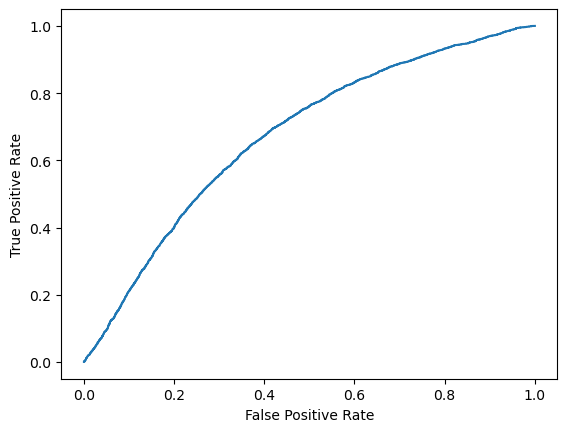

In [40]:
test_classes=LogisticR(x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.92      0.52      0.66     15927
           1       0.30      0.83      0.44      3971

    accuracy                           0.58     19898
   macro avg       0.61      0.67      0.55     19898
weighted avg       0.80      0.58      0.62     19898

(array([0.00000000e+00, 5.65078169e-04, 1.25572926e-03, 1.56966158e-03,
       1.94638036e-03, 3.16443775e-02, 3.23350286e-02, 5.97099265e-02,
       6.19074528e-02, 1.53764048e-01, 1.67953789e-01, 3.02567966e-01,
       3.30068437e-01, 3.30194010e-01, 3.35342500e-01, 3.58887424e-01,
       4.32787091e-01, 4.82702329e-01, 4.83016262e-01, 5.82344447e-01,
       5.84416400e-01, 6.14491116e-01, 6.15809631e-01, 6.18509449e-01,
       6.20079111e-01, 6.21460413e-01, 6.25478747e-01, 6.65473724e-01,
       9.37778615e-01, 9.98681484e-01, 1.00000000e+00]), array([0.        , 0.00277008, 0.00402921, 0.00503651, 0.00654747,
       0.08990179, 0.08990179, 0.15839839, 0.162931

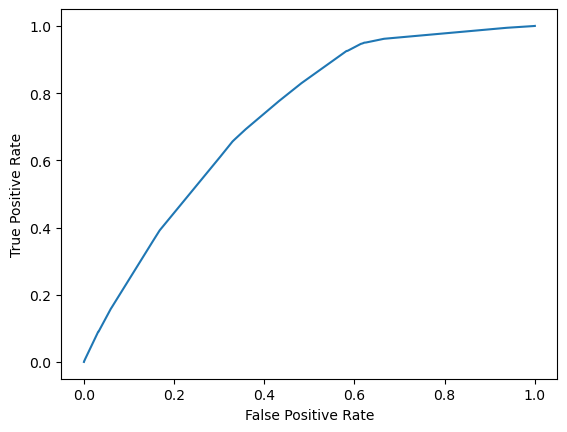

In [41]:
test_score=decision(x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.92      0.57      0.70     15927
           1       0.32      0.80      0.45      3971

    accuracy                           0.61     19898
   macro avg       0.62      0.68      0.58     19898
weighted avg       0.80      0.61      0.65     19898

(array([0.        , 0.        , 0.        , ..., 0.9990582 , 0.99924656,
       1.        ]), array([0.00000000e+00, 2.51825737e-04, 7.55477210e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), array([       inf, 0.85188702, 0.81911724, ..., 0.04165697, 0.04125004,
       0.04049015]))
ROC AUC: 0.7451
None


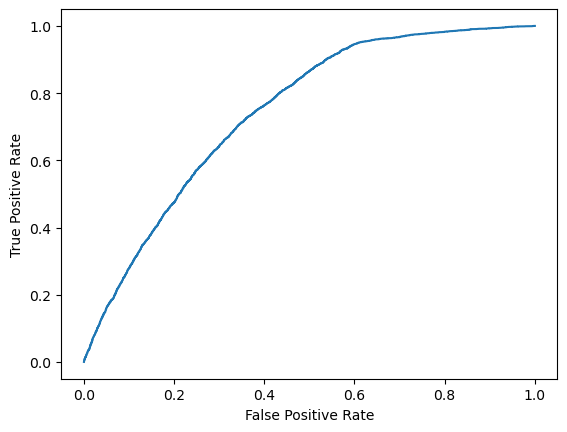

In [42]:
y_pred_rf=random(x_train,y_train,x_test,y_test)

In [43]:

rf = RandomForestClassifier(**{'n_estimators': 500, 
                           'min_samples_split': 20, 
                           'min_samples_leaf': 10, 
                           'max_features': 10, 
                           'max_depth': 50, 
                           'class_weight': 'balanced', 
                           'bootstrap': True})
rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test1)
test_score=rf.predict_proba(x_test1)[:,1]

print(y_pred_rf)


[0 1 0 ... 1 1 1]


In [44]:
test[["PatientId"]]

,PatientId
0,7.223289e+12
1,8.632298e+14
2,4.438587e+14
3,4.179932e+13
4,3.647762e+13
...,...
10849,5.133650e+14
10850,3.635534e+13
10851,3.596266e+12
10852,9.213493e+13


In [53]:
test_prob=pd.DataFrame({"No-show-prob":test_score})

In [54]:
test_prob

,No-show-prob
0,0.110206
1,0.651778
2,0.276858
3,0.104860
4,0.623398
...,...
10849,0.555752
10850,0.533592
10851,0.524757
10852,0.619562


In [55]:
test[["PatientId"]].shape

(10854, 1)

In [56]:
test_prob.shape

(10854, 1)

In [57]:
submission=pd.concat([test[["PatientId"]],test_prob ], axis=1)
submission

,PatientId,No-show-prob
0,7.223289e+12,0.110206
1,8.632298e+14,0.651778
2,4.438587e+14,0.276858
3,4.179932e+13,0.104860
4,3.647762e+13,0.623398
...,...,...
10849,5.133650e+14,0.555752
10850,3.635534e+13,0.533592
10851,3.596266e+12,0.524757
10852,9.213493e+13,0.619562


In [58]:
pd.DataFrame(submission).to_csv("Med_No_show_Yashmin_submission1.csv",index=False)

In [87]:
df = pd.DataFrame(train)

# Convert the 'datetime' column to datetime type

df['datetime'] = pd.to_datetime(df['AppointmentDay'], errors='coerce')

# Extract the date and the day of the week
df['date'] = df['datetime'].dt.date
df['day_of_week'] = df['datetime'].dt.day_name()

# Calculate the day with maximum entries
#max_entries_day = df['day_of_week'].mode()[0]

day_counts = df['day_of_week'].value_counts()
min_entries_day = day_counts.idxmin()
max_entries_day=day_counts.idxmax()
# Output the dataframe and the day with maximum entries
print(df)
print(f"The day with the maximum entries is: {max_entries_day}")
print(f"The day with the minimum entries is: {min_entries_day}")

          PatientId  AppointmentID          ScheduledDay  \
0      2.987250e+13        5642903  2016-04-29T18:38:08Z   
1      5.589978e+14        5642503  2016-04-29T16:08:27Z   
2      8.679512e+11        5642828  2016-04-29T17:29:31Z   
3      8.841186e+12        5642494  2016-04-29T16:07:23Z   
4      9.598513e+13        5626772  2016-04-27T08:36:51Z   
...             ...            ...                   ...   
99485  9.969977e+14        5650534  2016-05-03T07:51:47Z   
99486  3.635534e+13        5651072  2016-05-03T08:23:40Z   
99487  3.596266e+12        5650093  2016-05-03T07:27:33Z   
99488  1.557663e+13        5630692  2016-04-27T16:03:52Z   
99489  3.775115e+14        5629448  2016-04-27T13:30:56Z   

             AppointmentDay  SMS_received No-show  Hipertension  Diabetes  \
0      2016-04-29T00:00:00Z             0      No             1         0   
1      2016-04-29T00:00:00Z             0      No             0         0   
2      2016-04-29T00:00:00Z             0      N

In [72]:
(11268/99491)*100


11.325647546009186

In [79]:
category_counts = train[["Neighbourhood"]].value_counts()

# Find the category with the maximum frequency
max_category = category_counts.idxmax()

# Return the category and its frequency
print(max_category)

('JARDIM CAMBURI',)


In [98]:
11268/20131

0.559733743976951